In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # T0 get visualization on missing values
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

**Check and Solve spelling mistakes**

In [4]:
#All Values are unique So drop the column
df.drop(["id"],axis=1,inplace=True)

In [5]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [6]:
df['Marital Status'].unique()

array(['Married', 'Divorced', 'Single', nan], dtype=object)

In [7]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'High School', 'PhD'], dtype=object)

In [8]:
df['Education Level'] = df['Education Level'].replace({"Bachelor's":"Bachelor's Degree"})

In [9]:
df['Education Level'] = df['Education Level'].apply(lambda i: "Master's Degree" if(i == "Master's" or i == "Mast") else i )

In [10]:
df['Education Level'].unique()

array(["Bachelor's Degree", "Master's Degree", 'High School', 'PhD'],
      dtype=object)

In [11]:
df['Occupation'].unique()

array(['Self-Employed', nan, 'Employed', 'Unemployed'], dtype=object)

In [12]:
df['Location'].unique()

array(['Urban', 'Rural', 'Suburban'], dtype=object)

In [13]:
df["Policy Type"].unique()

array(['Premium', 'Comprehensive', 'Basic'], dtype=object)

In [14]:
df['Policy Type'] = df['Policy Type'].apply(lambda i: "Comprehensive" if (i == "Comprehens") else i)

In [15]:
df['Customer Feedback'].unique()

array(['Poor', 'Average', 'Good', nan], dtype=object)

In [16]:
df['Smoking Status'].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
df['Exercise Frequency'].unique()

array(['Weekly', 'Monthly', 'Daily', 'Rarely'], dtype=object)

In [18]:
df['Property Type'].unique()

array(['House', 'Apartment', 'Condo'], dtype=object)

**Null values and duplicated Handling**

In [19]:
print("Rows    :", df.shape[0])
print("Columns :", df.shape[1])

Rows    : 1200000
Columns : 20


In [20]:
print("*"*40,"\nMissing values:\n\n",df.isnull().sum().sort_values(ascending = False))

**************************************** 
Missing values:

 Previous Claims         364029
Occupation              358075
Credit Score            137882
Number of Dependents    109672
Customer Feedback        77824
Health Score             74076
Annual Income            44949
Age                      18705
Marital Status           18529
Vehicle Age                  6
Insurance Duration           1
Gender                       0
Location                     0
Policy Type                  0
Education Level              0
Policy Start Date            0
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1181295 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1155051 non-null  float64
 3   Marital Status        1181471 non-null  object 
 4   Number of Dependents  1090328 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            841925 non-null   object 
 7   Health Score          1125924 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       835971 non-null   float64
 11  Vehicle Age           1199994 non-null  float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Policy Start Date     1200000 non-

In [22]:
print("*"*40,"\nPrecentage Missing Values : \n\n", round(df.isna().sum() / df.isna().count()*100,2 ))

**************************************** 
Precentage Missing Values : 

 Age                      1.56
Gender                   0.00
Annual Income            3.75
Marital Status           1.54
Number of Dependents     9.14
Education Level          0.00
Occupation              29.84
Health Score             6.17
Location                 0.00
Policy Type              0.00
Previous Claims         30.34
Vehicle Age              0.00
Credit Score            11.49
Insurance Duration       0.00
Policy Start Date        0.00
Customer Feedback        6.49
Smoking Status           0.00
Exercise Frequency       0.00
Property Type            0.00
Premium Amount           0.00
dtype: float64


In [23]:
print("*"*40,"\nunique Value : \n\n", df.nunique())

**************************************** 
unique Value : 

 Age                         47
Gender                       2
Annual Income            88593
Marital Status               3
Number of Dependents         5
Education Level              4
Occupation                   3
Health Score            532657
Location                     3
Policy Type                  3
Previous Claims             10
Vehicle Age                 20
Credit Score               550
Insurance Duration           9
Policy Start Date       167381
Customer Feedback            3
Smoking Status               2
Exercise Frequency           4
Property Type                3
Premium Amount            4794
dtype: int64


In [24]:
print("*"*40,"\nDuplicated Value : \n\n", df.duplicated().sum())

**************************************** 
Duplicated Value : 

 0


In [25]:
df.isnull().sum()

Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

<Axes: >

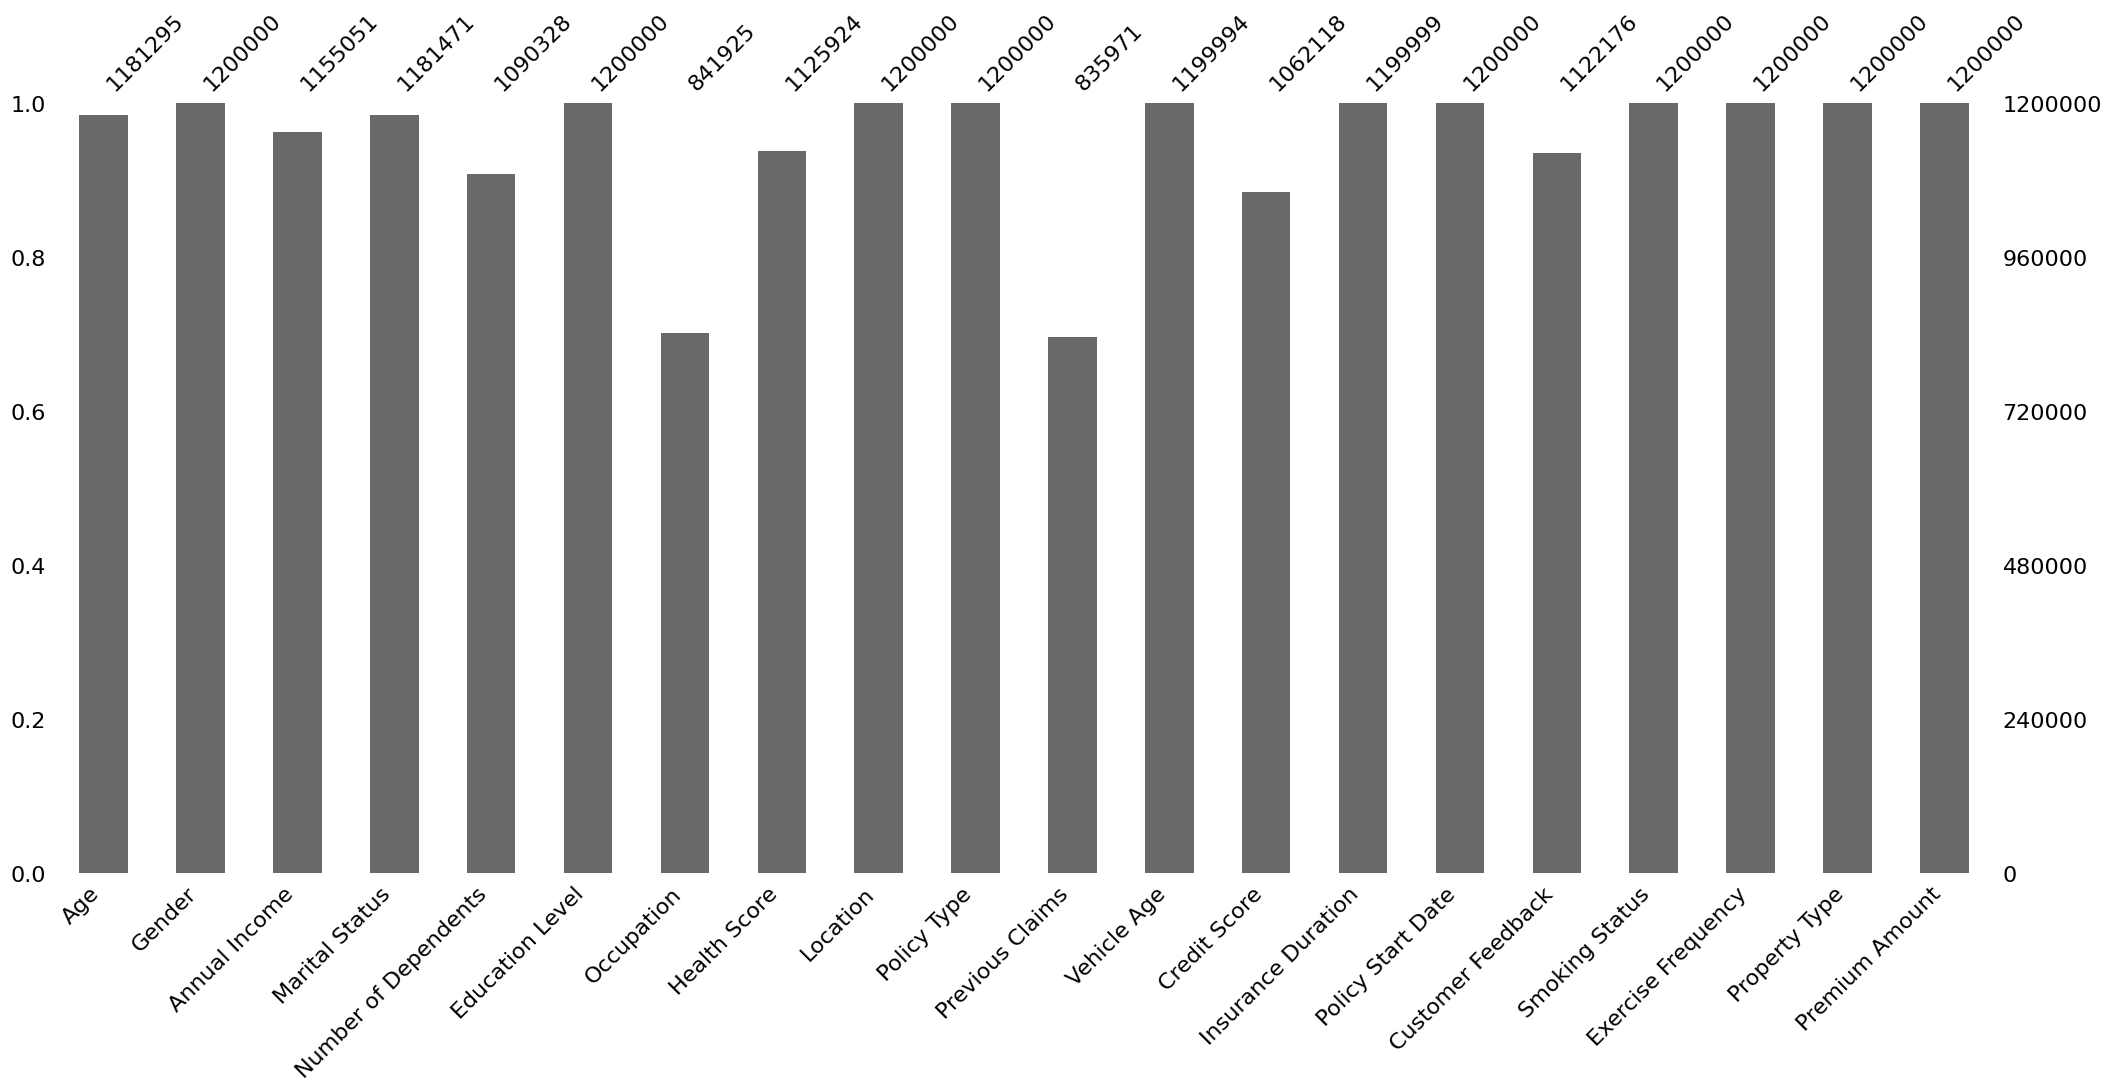

In [26]:
#visualize missing values
msno.bar(df)

Obeservation

Previous Claims has only 9149 values. 30% values are Missing.

Premium Amount, which is a Target variable 1 missing values. This needs to be analysed further.

Age has only 189 values missing and one of key factor in deciding Premium Amount.

Occupation  has 3867 values missing.

Credit Score has 1535 values Missing.It will be help to Predict Premium Amount.



In [27]:
pd.set_option("display.max_columns", None)

In [28]:
df

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19.0,Female,10049.0,Married,1.0,Bachelor's Degree,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's Degree,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's Degree,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's Degree,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,36.0,Female,27316.0,Married,0.0,Master's Degree,Unemployed,13.772907,Urban,Premium,NaN,5.0,372.0,3.0,2023-05-03 15:21:39.257696,Poor,No,Daily,Apartment,1303.0
1199996,54.0,Male,35786.0,Divorced,NaN,Master's Degree,Self-Employed,11.483482,Rural,Comprehensive,NaN,10.0,597.0,4.0,2022-09-10 15:21:39.134960,Poor,No,Weekly,Apartment,821.0
1199997,19.0,Male,51884.0,Divorced,0.0,Master's Degree,NaN,14.724469,Suburban,Basic,0.0,19.0,NaN,6.0,2021-05-25 15:21:39.106582,Good,No,Monthly,Condo,371.0
1199998,55.0,Male,NaN,Single,1.0,PhD,NaN,18.547381,Suburban,Premium,1.0,7.0,407.0,4.0,2021-09-19 15:21:39.190215,Poor,No,Daily,Apartment,596.0


**NaN replaced with the most frequent value**

In [29]:
# List of categorical columns to fill with mode
columns_to_fill = [
    "Occupation", "Location", "Marital Status", "Policy Type", 
    "Customer Feedback", "Smoking Status", "Exercise Frequency", 
    "Property Type", "Education Level"
]

# Loop through each column and fill NaN with mode
for col in columns_to_fill:
    mode_value = df[col].mode()[0]   # Get the most frequent value
    df[col] = df[col].fillna(mode_value)


In [30]:
df.isnull().sum()

Age                      18705
Gender                       0
Annual Income            44949
Marital Status               0
Number of Dependents    109672
Education Level              0
Occupation                   0
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback            0
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

Continues Coulumns Nan Replace Skewness values

In [31]:
# Dictionary to record what we did
imputation_summary = {}

# Loop through numeric columns
for col in df.select_dtypes(include='number').columns:
    # Clean column: force numeric & replace infinities
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].replace([np.inf, -np.inf], np.nan)

    # Count missing
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        skewness = df[col].skew()

        # Decide method
        if abs(skewness) < 0.5:
            method = "mean"
            fill_value = df[col].mean()
        else:
            method = "median"
            fill_value = df[col].median()

        # Fill NaN
        df[col] = df[col].fillna(fill_value)

        # Record decision
        imputation_summary[col] = {
            "missing_before": missing_count,
            "skewness": round(skewness, 3),
            "method_used": method,
            "fill_value": round(fill_value, 3)

        }

# Convert summary to DataFrame for easy viewing
summary_df = pd.DataFrame(imputation_summary).T
print("\n Imputation Summary:")
print(summary_df)



 Imputation Summary:
                     missing_before skewness method_used fill_value
Age                           18705   -0.013        mean     41.146
Annual Income                 44949     1.47      median    23911.0
Number of Dependents         109672   -0.013        mean       2.01
Health Score                  74076    0.282        mean     25.614
Previous Claims              364029    0.905      median        1.0
Vehicle Age                       6    -0.02        mean       9.57
Credit Score                 137882   -0.114        mean    592.924
Insurance Duration                1   -0.009        mean      5.018


In [32]:
df.isnull().sum()

Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64

**Date Handling**

In [33]:
df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'], errors='coerce')

In [34]:
df.isnull().sum()

Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64

In [35]:
df["Policy_Start_Year"] = df['Policy Start Date'].dt.year
df["Policy_Start_Date"] = df['Policy Start Date'].dt.day
df["Policy_Start_Month"] =df['Policy Start Date'].dt.month

In [36]:
df.drop(["Policy Start Date"],axis=1,inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1200000 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1200000 non-null  float64
 3   Marital Status        1200000 non-null  object 
 4   Number of Dependents  1200000 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            1200000 non-null  object 
 7   Health Score          1200000 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       1200000 non-null  float64
 11  Vehicle Age           1200000 non-null  float64
 12  Credit Score          1200000 non-null  float64
 13  Insurance Duration    1200000 non-null  float64
 14  Customer Feedback     1200000 non-

In [38]:
df.isnull().sum()

Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
Policy_Start_Year       0
Policy_Start_Date       0
Policy_Start_Month      0
dtype: int64

In [39]:
df.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type',
       'Premium Amount', 'Policy_Start_Year', 'Policy_Start_Date',
       'Policy_Start_Month'],
      dtype='object')

##Pandas Analysis

Premium Analysis

In [40]:
print("Average Premium Amount:", df["Premium Amount"].mean())
print("Highest Premium Amount:", df["Premium Amount"].max())
print("Lowest Premium Amount:", df["Premium Amount"].min())

Average Premium Amount: 1102.5448216666666
Highest Premium Amount: 4999.0
Lowest Premium Amount: 20.0


 Age Analysis

In [41]:
print("Average Age:", df["Age"].mean())
print("Youngest Customer:", df["Age"].min())
print("Oldest Customer:", df["Age"].max())


Average Age: 41.14556313198648
Youngest Customer: 18.0
Oldest Customer: 64.0


Gender Distribution

In [42]:
print(df["Gender"].value_counts())

Gender
Male      602571
Female    597429
Name: count, dtype: int64


Marital Status Distribution

In [43]:
print(df["Marital Status"].value_counts())

Marital Status
Single      413920
Married     394316
Divorced    391764
Name: count, dtype: int64


Average Premium by Gender

In [44]:
print(df.groupby("Gender")["Premium Amount"].mean())

Gender
Female    1102.404974
Male      1102.683476
Name: Premium Amount, dtype: float64


Average Premium by Policy Type

In [45]:
print(df.groupby("Policy Type")["Premium Amount"].mean())

Policy Type
Basic            1103.452466
Comprehensive    1102.610526
Premium          1101.579277
Name: Premium Amount, dtype: float64


Premium trend by Gender and Policy Type

In [46]:
# Premium trend by Gender and Policy Type
premium_trends = df.groupby(["Gender", "Policy Type"])["Premium Amount"].mean().reset_index()

print(premium_trends)


   Gender    Policy Type  Premium Amount
0  Female          Basic     1105.405626
1  Female  Comprehensive     1102.683547
2  Female        Premium     1099.163721
3    Male          Basic     1101.522939
4    Male  Comprehensive     1102.538153
5    Male        Premium     1103.983654


# Average premium by Policy Type

In [47]:
avg_premium_policy = df.groupby("Policy Type")["Premium Amount"].mean().sort_values(ascending=False)
print("\nAverage Premium by Policy Type:\n", avg_premium_policy)


Average Premium by Policy Type:
 Policy Type
Basic            1103.452466
Comprehensive    1102.610526
Premium          1101.579277
Name: Premium Amount, dtype: float64


 Distribution plots for numeric columns

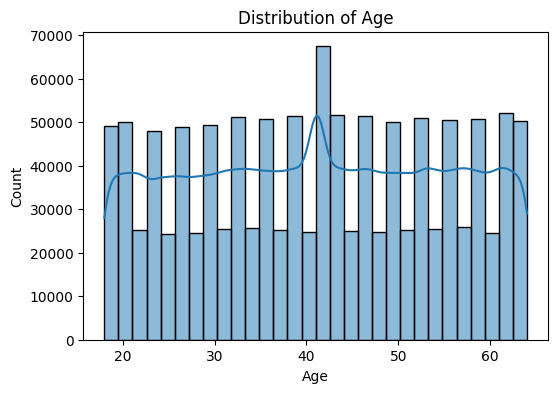

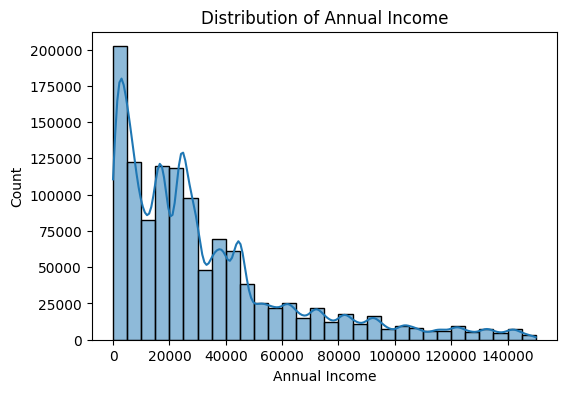

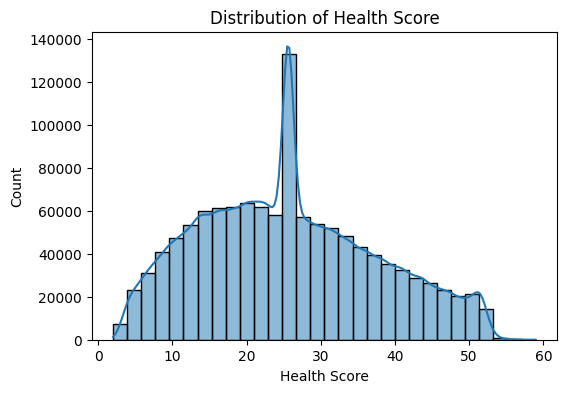

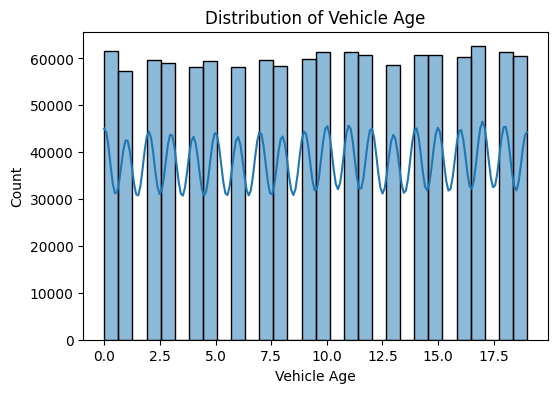

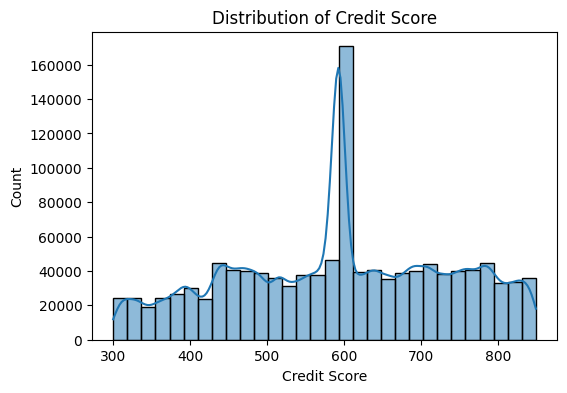

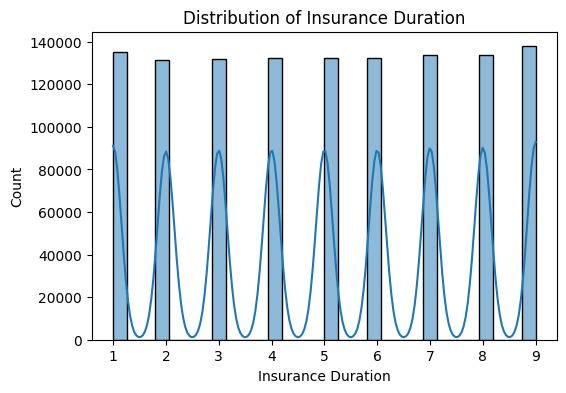

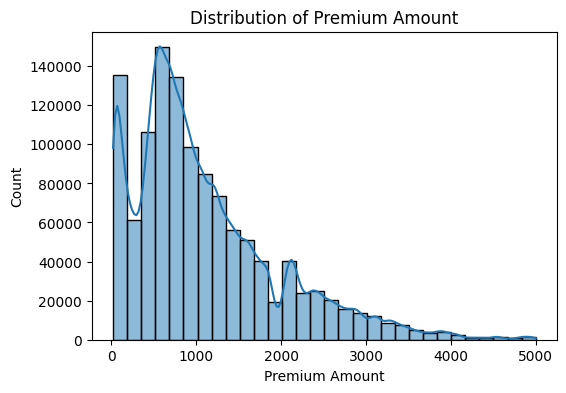

In [48]:
numeric_cols = ['Age', 'Annual Income', 'Health Score', 'Vehicle Age', 
                'Credit Score', 'Insurance Duration', 'Premium Amount']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

Count plots for categorical columns

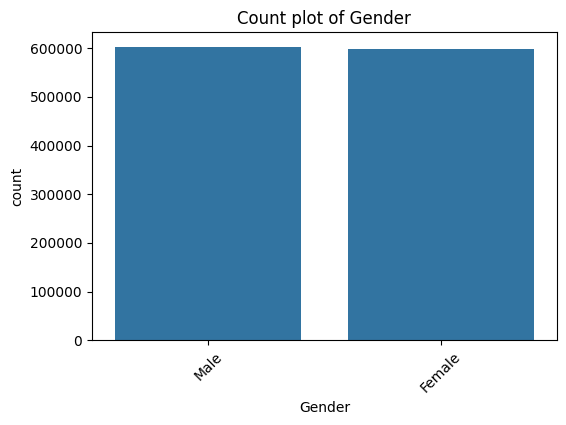

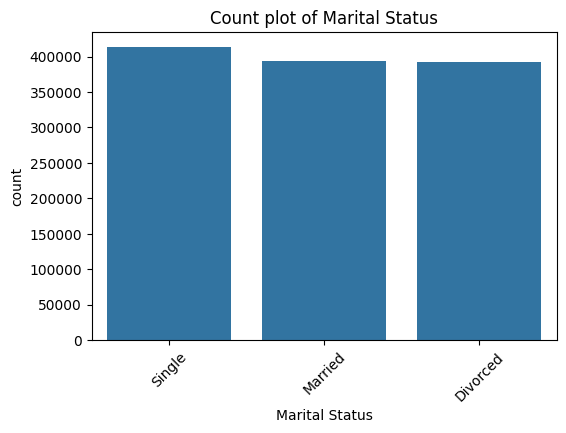

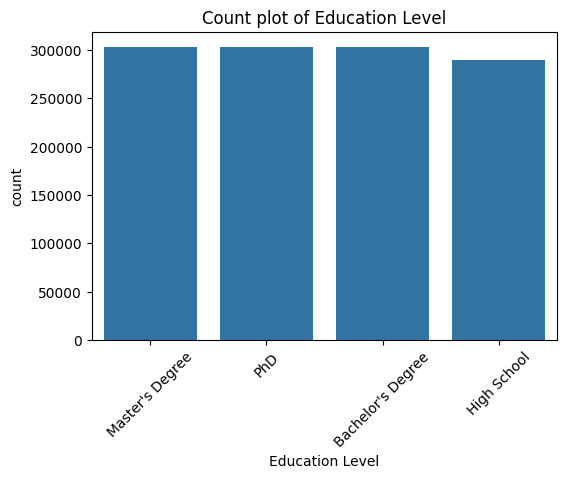

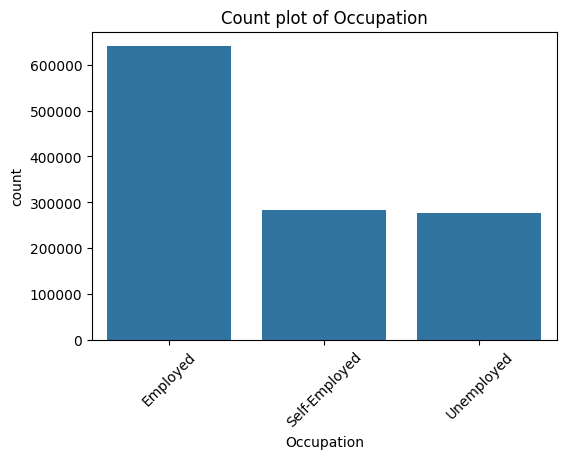

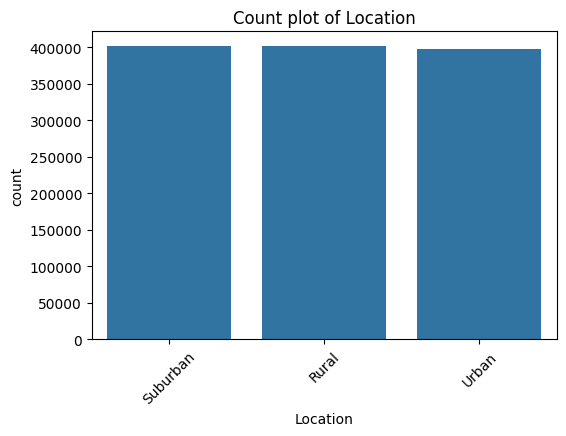

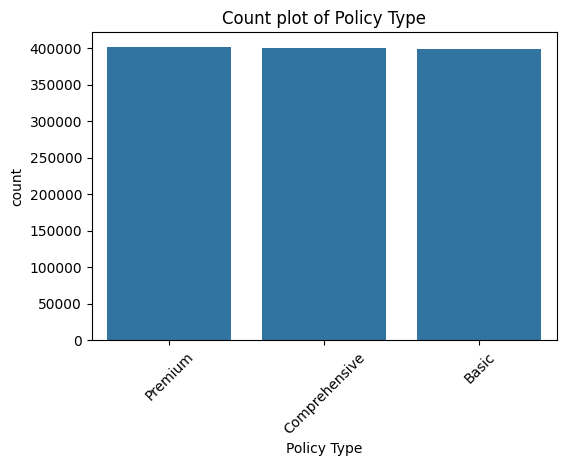

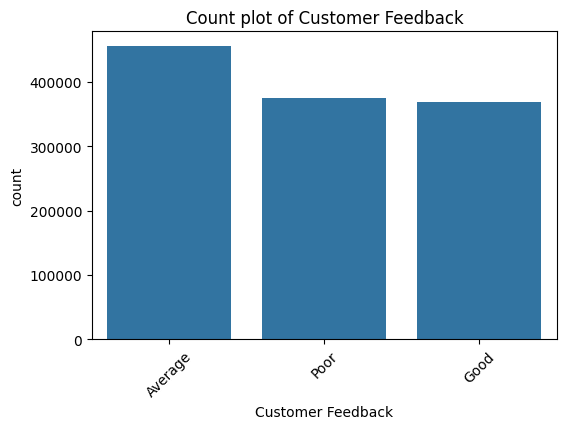

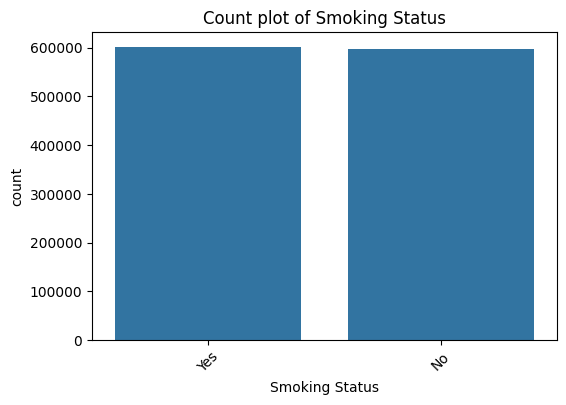

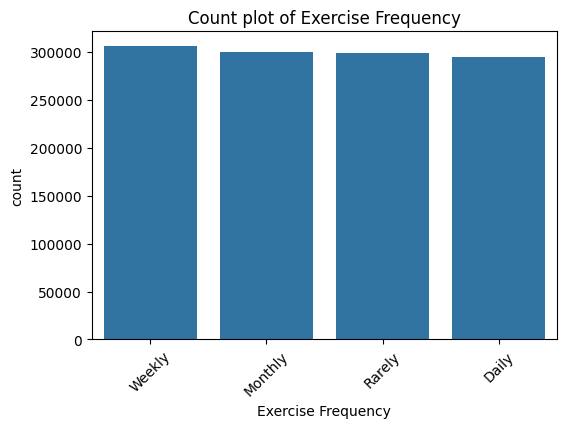

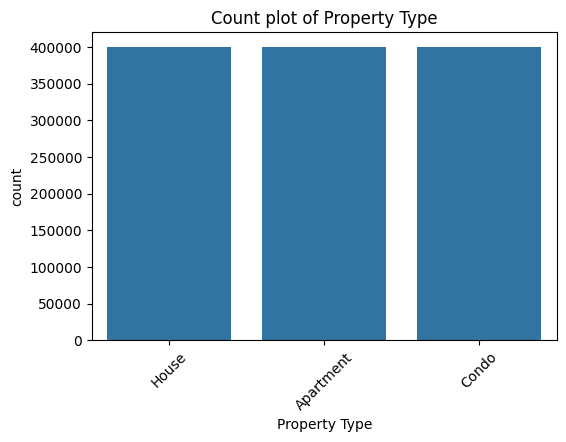

In [49]:
categorical_cols = ['Gender', 'Marital Status', 'Education Level', 'Occupation',
                    'Location', 'Policy Type', 'Customer Feedback', 
                    'Smoking Status', 'Exercise Frequency', 'Property Type']
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Count plot of {col}')
    plt.show()

Correlation Analysis

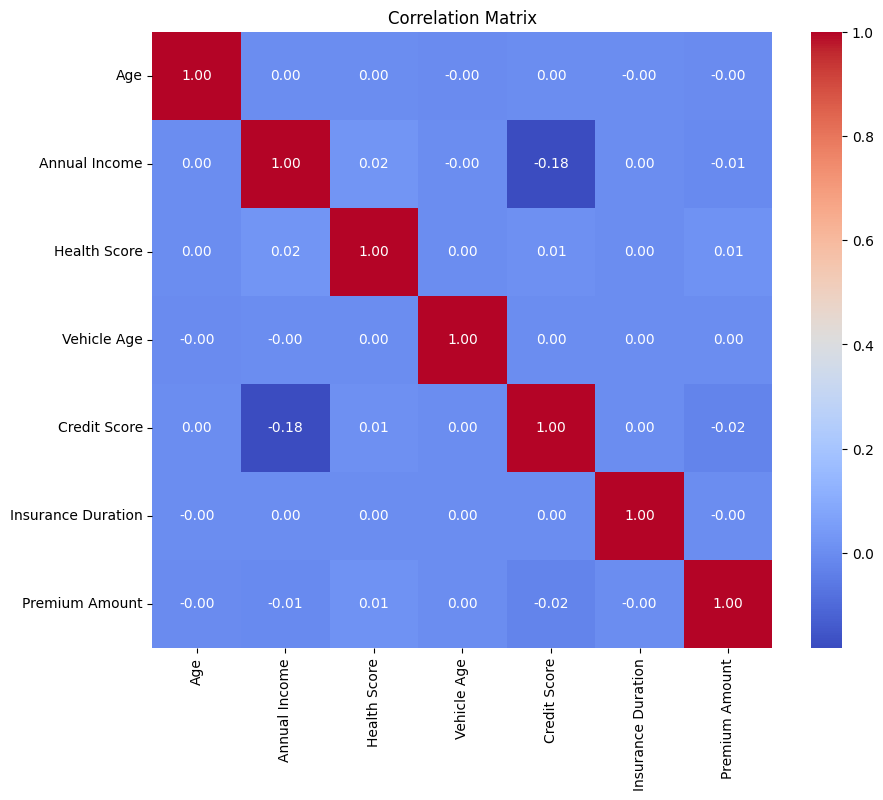

In [50]:
plt.figure(figsize=(10,8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Find the Continous columns vs Category columns

In [51]:
continuous = []
categories = []
for i in df.columns:
  if df[i].nunique() > 55 :
    continuous.append(i)
  else:
    categories.append(i)
print(continuous)
print(categories)

['Annual Income', 'Health Score', 'Credit Score', 'Premium Amount']
['Age', 'Gender', 'Marital Status', 'Number of Dependents', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age', 'Insurance Duration', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type', 'Policy_Start_Year', 'Policy_Start_Date', 'Policy_Start_Month']


Encoding the Categorical Columns

In [52]:
from sklearn.preprocessing import OrdinalEncoder

In [53]:
O = OrdinalEncoder()

In [54]:
for i in df.select_dtypes(include=["object"]).columns:
  print(i,df[i].unique())

Gender ['Female' 'Male']
Marital Status ['Married' 'Divorced' 'Single']
Education Level ["Bachelor's Degree" "Master's Degree" 'High School' 'PhD']
Occupation ['Self-Employed' 'Employed' 'Unemployed']
Location ['Urban' 'Rural' 'Suburban']
Policy Type ['Premium' 'Comprehensive' 'Basic']
Customer Feedback ['Poor' 'Average' 'Good']
Smoking Status ['No' 'Yes']
Exercise Frequency ['Weekly' 'Monthly' 'Daily' 'Rarely']
Property Type ['House' 'Apartment' 'Condo']


In [55]:
for i in df.select_dtypes(include=["object"]).columns:
  df[i] = O.fit_transform(df[[i]])

In [56]:
df.shape

(1200000, 22)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1200000 non-null  float64
 1   Gender                1200000 non-null  float64
 2   Annual Income         1200000 non-null  float64
 3   Marital Status        1200000 non-null  float64
 4   Number of Dependents  1200000 non-null  float64
 5   Education Level       1200000 non-null  float64
 6   Occupation            1200000 non-null  float64
 7   Health Score          1200000 non-null  float64
 8   Location              1200000 non-null  float64
 9   Policy Type           1200000 non-null  float64
 10  Previous Claims       1200000 non-null  float64
 11  Vehicle Age           1200000 non-null  float64
 12  Credit Score          1200000 non-null  float64
 13  Insurance Duration    1200000 non-null  float64
 14  Customer Feedback     1200000 non-

In [58]:
df

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Policy_Start_Year,Policy_Start_Date,Policy_Start_Month
0,19.0,0.0,10049.0,1.0,1.000000,0.0,1.0,22.598761,2.0,2.0,2.0,17.0,372.00000,5.0,2.0,0.0,3.0,2.0,2869.0,2023,23,12
1,39.0,0.0,31678.0,0.0,3.000000,2.0,0.0,15.569731,0.0,1.0,1.0,12.0,694.00000,2.0,0.0,1.0,1.0,2.0,1483.0,2023,12,6
2,23.0,1.0,25602.0,0.0,3.000000,1.0,1.0,47.177549,1.0,2.0,1.0,14.0,592.92435,3.0,1.0,1.0,3.0,2.0,567.0,2023,30,9
3,21.0,1.0,141855.0,1.0,2.000000,0.0,0.0,10.938144,0.0,0.0,1.0,0.0,367.00000,1.0,2.0,1.0,0.0,0.0,765.0,2024,12,6
4,21.0,1.0,39651.0,2.0,1.000000,0.0,1.0,20.376094,0.0,2.0,0.0,8.0,598.00000,4.0,2.0,1.0,3.0,2.0,2022.0,2021,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,36.0,0.0,27316.0,1.0,0.000000,2.0,2.0,13.772907,2.0,2.0,1.0,5.0,372.00000,3.0,2.0,0.0,0.0,0.0,1303.0,2023,3,5
1199996,54.0,1.0,35786.0,0.0,2.009934,2.0,1.0,11.483482,0.0,1.0,1.0,10.0,597.00000,4.0,2.0,0.0,3.0,0.0,821.0,2022,10,9
1199997,19.0,1.0,51884.0,0.0,0.000000,2.0,0.0,14.724469,1.0,0.0,0.0,19.0,592.92435,6.0,1.0,0.0,1.0,1.0,371.0,2021,25,5
1199998,55.0,1.0,23911.0,2.0,1.000000,3.0,0.0,18.547381,1.0,2.0,1.0,7.0,407.00000,4.0,2.0,0.0,0.0,0.0,596.0,2021,19,9


In [59]:
df.corr()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Policy_Start_Year,Policy_Start_Date,Policy_Start_Month
Age,1.000000,0.000215,0.000062,0.000224,0.001395,-0.000416,0.001394,0.000847,0.001861,-0.000406,0.001546,-0.002436,0.002652,-0.000063,0.000271,-0.000629,0.000420,-0.001175,-0.002411,-0.003152,-0.000595,0.001195
Gender,0.000215,1.000000,-0.000983,0.001285,0.000834,0.000558,0.000472,0.003420,0.001225,-0.001539,-0.000229,0.000949,0.000757,0.000266,0.000533,0.003187,-0.000568,-0.000994,0.000161,0.000446,0.000557,0.001254
Annual Income,0.000062,-0.000983,1.000000,0.004035,0.001936,0.000257,0.003371,0.023263,0.000434,-0.000843,0.034777,-0.000438,-0.180955,0.000383,-0.015830,-0.001492,0.001439,-0.000462,-0.009989,-0.009716,0.000346,0.008825
Marital Status,0.000224,0.001285,0.004035,1.000000,-0.000659,-0.000986,0.002385,0.001575,0.000519,0.000155,0.000242,0.001132,-0.002791,-0.000510,0.000781,-0.000266,-0.000247,-0.003362,0.003021,0.001594,0.002019,-0.000903
Number of Dependents,0.001395,0.000834,0.001936,-0.000659,1.000000,0.000341,-0.001253,0.004752,-0.000349,-0.001179,-0.003269,0.001174,-0.001534,-0.000253,-0.000995,0.000599,-0.000475,0.002106,-0.000928,0.000353,0.000199,-0.000440
Education Level,-0.000416,0.000558,0.000257,-0.000986,0.000341,1.000000,0.000596,0.001373,0.002941,0.001344,0.000245,0.000743,-0.002020,0.000575,0.001136,0.000424,0.001498,0.001245,-0.001121,0.000349,-0.002491,0.000176
Occupation,0.001394,0.000472,0.003371,0.002385,-0.001253,0.000596,1.000000,0.002445,0.001271,-0.000507,0.002132,0.000984,-0.004573,0.001421,-0.001850,-0.000701,-0.001754,-0.003419,0.003185,0.000914,0.001719,0.001428
Health Score,0.000847,0.003420,0.023263,0.001575,0.004752,0.001373,0.002445,1.000000,-0.002063,-0.002343,0.001620,0.000306,0.011032,0.002409,-0.001419,-0.001986,-0.000802,-0.001025,0.014326,-0.001560,-0.000698,0.000523
Location,0.001861,0.001225,0.000434,0.000519,-0.000349,0.002941,0.001271,-0.002063,1.000000,0.000331,-0.000860,-0.000009,-0.000547,0.001933,-0.002183,0.001860,0.000528,-0.000434,0.001059,-0.001317,0.001158,-0.000140
Policy Type,-0.000406,-0.001539,-0.000843,0.000155,-0.001179,0.001344,-0.000507,-0.002343,0.000331,1.000000,-0.002091,0.001127,-0.001059,-0.000979,0.001430,-0.001745,0.002895,-0.001287,-0.000884,0.002634,-0.000047,0.000345


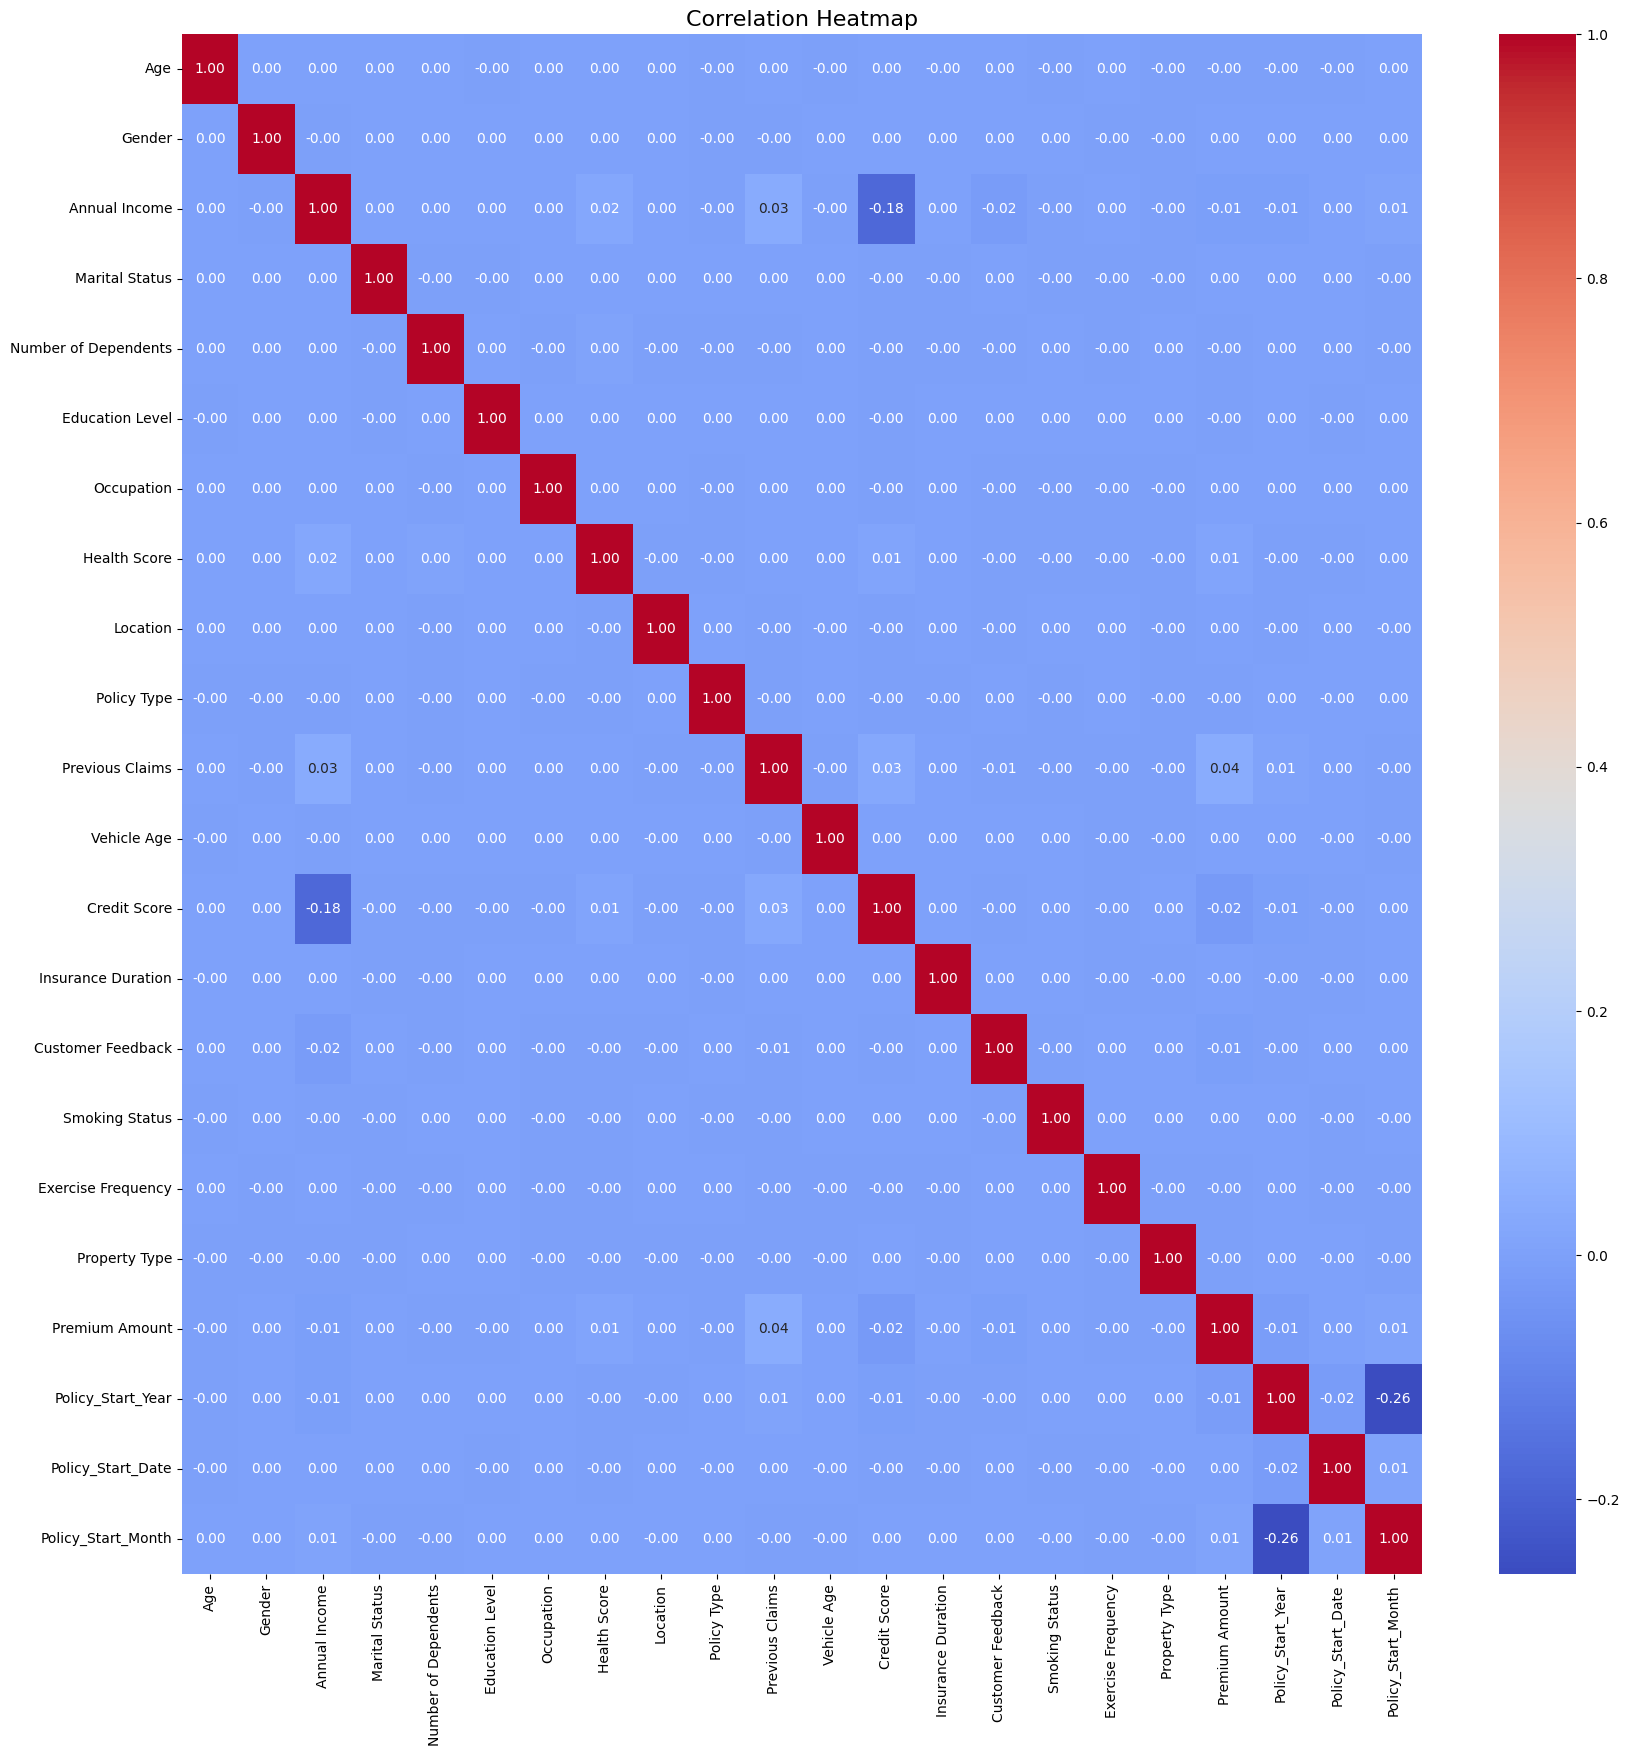

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr = df.corr(numeric_only=True)   # numeric_only=True for pandas >= 1.5

# Plot heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


In [61]:
from scipy import stats

In [62]:
#TWO SAMPLE T - TEST : continuous vs continuous
def two_sample(d1,d2):
  t=0
  f=0
  for i in  range(31):
    sample1=d1.sample(frac=0.03)
    sample2=d2.sample(frac=0.03)
    t_test,p_value=stats.ttest_ind(sample1,sample2)
    if p_value < 0.05:
      f=f+1
    else:
      t=t+1
  if t>f:
    return True
  else:
    return False


In [63]:
#CHI-SQUARE TEST - category vs category
def chisquare_cat_vs_cat(d1,d2):
    return True if stats.chi2_contingency(pd.crosstab(d1,d2))[1] < 0.05 else False

In [64]:
#ANNOVA TEST - continious vs category
def annova_test(d1,d2):
    group= df[d2].unique()
    data = {}
    for i in group:
        data[i]=df[d1][df[d2]==i]
    f_value,p_value=stats.f_oneway(*[i for i in data.values()])
    return False if p_value < 0.05 else True

In [65]:
#All the statistical test being done across all the columns
final = {}
for i in df.columns:
    final[i]={}
    for j in df.columns:
        if (i in continuous) and (j in continuous):
            result=two_sample(df[i],df[j])
        elif (i in continuous) and (j in categories):
            result=annova_test(i,j)
        elif (i in categories) and (j in continuous):
            result=annova_test(j,i)
        elif (i in categories) and (j in categories):
            result=chisquare_cat_vs_cat(df[i],df[j])
        if result:
            final[i][j]=1
        else:
            final[i][j]=0

In [66]:
#The result of the statistical test which was in a dictionary is put into a dataframe
final_df = pd.DataFrame(final)
final_df

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Policy_Start_Year,Policy_Start_Date,Policy_Start_Month
Age,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0
Gender,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
Annual Income,1,1,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0
Marital Status,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0
Number of Dependents,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,1,0,1,1,1
Education Level,0,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,1,1,1,0,1,1
Occupation,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1
Health Score,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
Location,0,0,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,1,0
Policy Type,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0


<Axes: >

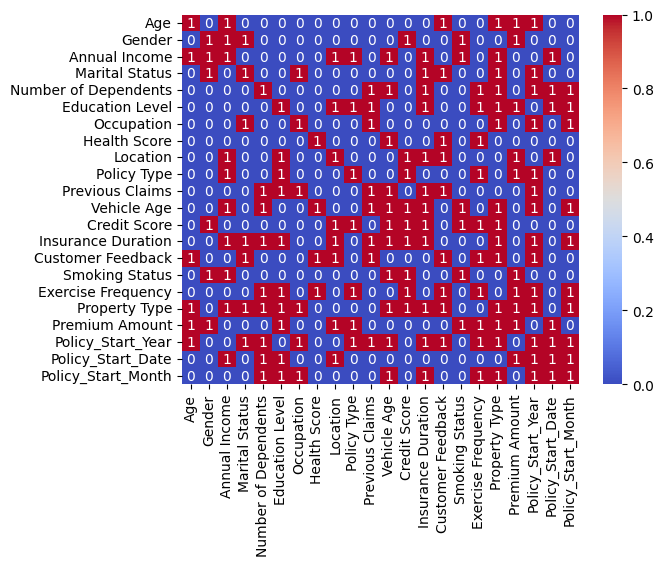

In [67]:
import seaborn as sns
#heatmap analysis for better visualisation of the stastical test results
sns.heatmap(final_df,annot=True,cmap="coolwarm")

Saprate the Continuous vs Category

In [68]:
continuous = []
categories = []
for i in df.columns:
  if df[i].nunique() > 55 :
    continuous.append(i)
  else:
    categories.append(i)
print(continuous)
print(categories)

['Annual Income', 'Health Score', 'Credit Score', 'Premium Amount']
['Age', 'Gender', 'Marital Status', 'Number of Dependents', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age', 'Insurance Duration', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type', 'Policy_Start_Year', 'Policy_Start_Date', 'Policy_Start_Month']


Check Skew and Kurotosis in Continuous Column

Annual Income 1.5229537478396937 2.016891197172637


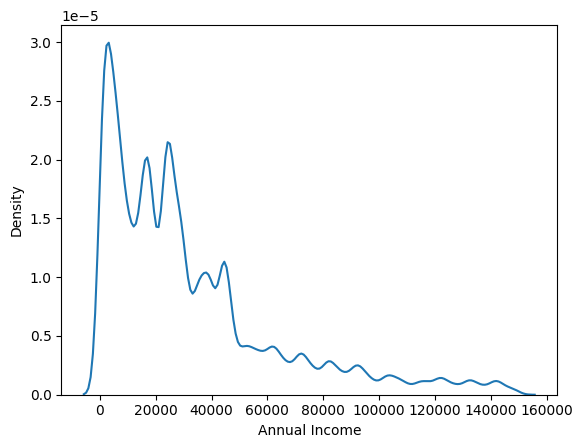

Health Score 0.2913221653165929 -0.6392715717115633


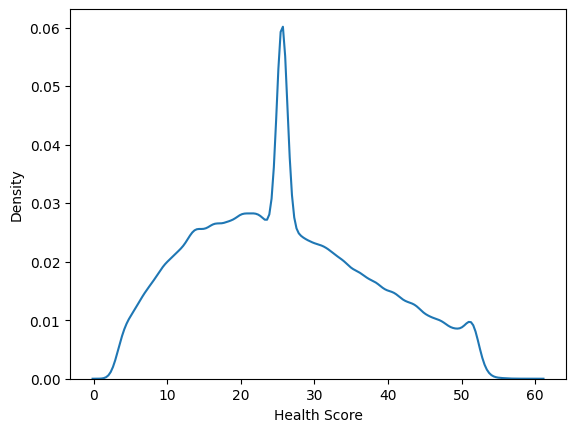

Credit Score -0.12071961175385612 -0.842162506033902


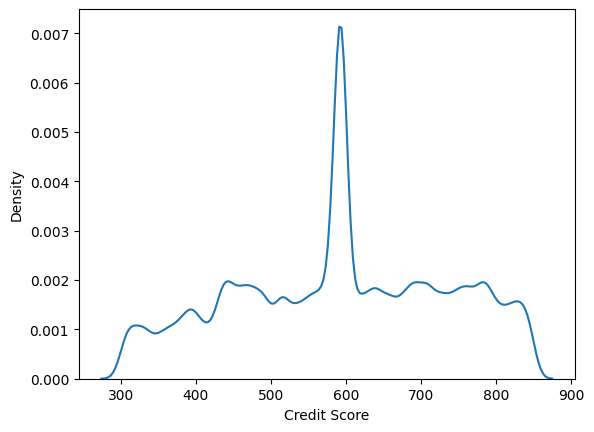

Premium Amount 1.2409154932891036 1.518585574799276


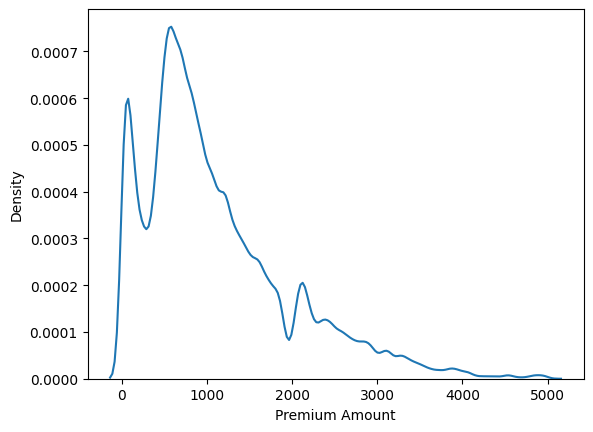

In [69]:
for i in continuous:
  print(i,df[i].skew(),df[i].kurtosis())
  sns.kdeplot(df[i])
  plt.show()

**Annual Income**

Annual Income 1.5222635423178108 2.011814413335795

Skew check (-0.5 to 0.5): 1.522  → Yes (skewed) → strong right skew.

Kurtosis check (-3 to 3): 2.012  → No (within normal range) → tails are okay.

**Credit Score:**

Credit Score -0.11747968538190698 -0.841988323837255

Skewness: If between -0.5 and 0.5 → No (not skewed)

Kurtosis: If between -3 and 3 → No (normal tailedness)

**Health Score**

Health Score 0.2912913582318331 -0.6367526414922553

Skew check (-0.5 to 0.5): 0.291 →  No (not skewed)

Kurtosis check (-3 to 3): -0.637 → No (normal tailedness)

**Premium Amount**

Premium Amount 1.2433607666564999 1.5269164603348555

Skew check (-0.5 to 0.5): 1.243 → Yes (skewed) → moderate right skew

Kurtosis check (-3 to 3): 1.527 → No (within range)

In [70]:
for i in continuous:
    if df[i].skew() > -0.5 and df[i].skew() < 0.5 and df[i].kurtosis() < 3 and df[i].kurtosis() > -3:
        continue
    print(i)

Annual Income
Premium Amount


In [71]:
# lmbda = 0, log x
# lmbda = 0.5, sqrt x
# lmbda = -0.5, 1/sqrt x
# lmbda = 1, x
# lmbda = -1, 1/x
# lmbda = 2, x**2
# lmbda = -2, x**-2

In [72]:
a = [0,0.5,1,2,-0.5,-1,-2]
for i in continuous:
    if df[i].skew() > -0.5 and df[i].skew() < 0.5 and df[i].kurtosis() < 3 and df[i].kurtosis() > -3:
        continue
    for j in a:
        print(i,j)
        print("skewness", *pd.DataFrame(stats.boxcox(df[i],lmbda = j)).skew().values,"kurtosis",*pd.DataFrame(stats.boxcox(df[i],lmbda = j)).kurtosis().values)
    print("-----------------------------")

Annual Income 0
skewness -1.0495548514957938 kurtosis 1.4553794608085169
Annual Income 0.5
skewness 0.4971849183192823 kurtosis -0.2584736227749982
Annual Income 1
skewness 1.5229537478396937 kurtosis 2.016891197172637
Annual Income 2
skewness 2.934788318084588 kurtosis 8.944968446700187
Annual Income -0.5
skewness -9.85489349346208 kurtosis 202.1924118306461
Annual Income -1
skewness -113.4601640190007 kurtosis 30085.745769860903
Annual Income -2
skewness -663.4684192199719 kurtosis 546617.5877385554
-----------------------------
Premium Amount 0
skewness -1.2712769506196264 kurtosis 1.6294745444761936
Premium Amount 0.5
skewness 0.19927083763811101 kurtosis -0.20863572846113687
Premium Amount 1
skewness 1.2409154932891036 kurtosis 1.518585574799277
Premium Amount 2
skewness 2.972682735403122 kurtosis 11.50287488955158
Premium Amount -0.5
skewness -2.8660192173574575 kurtosis 8.307603803623666
Premium Amount -1
skewness -3.9988513708363476 kurtosis 16.234174535141694
Premium Amount -2

**Annual Income**

Original skew = 1.522 (positively skewed)
Test results:

λ=0 (log): skew = -1.054 (too negative), kurtosis ok

λ=0.5 (sqrt): skew = 0.496 (within -0.5 to 0.5 → nearly normal), kurtosis = -0.258

λ=1 (identity): skew = 1.522 (still skewed)

Others: much worse (huge skew & kurtosis).

Best λ = 0.5 (√x) → makes Annual Income distribution close to normal.

**Premium Amount**

Original skew = 1.243 (positively skewed)
Test results:

λ=0 (log): skew = -1.266 (too negative)

λ=0.5 (sqrt): skew = 0.202 (perfectly inside -0.5 to 0.5), kurtosis = -0.212

λ=1 (identity): skew = 1.243 (skewed)

Others: much worse.

Best λ = 0.5 (√x) → gives nearly normal distribution

In [73]:
df

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Policy_Start_Year,Policy_Start_Date,Policy_Start_Month
0,19.0,0.0,10049.0,1.0,1.000000,0.0,1.0,22.598761,2.0,2.0,2.0,17.0,372.00000,5.0,2.0,0.0,3.0,2.0,2869.0,2023,23,12
1,39.0,0.0,31678.0,0.0,3.000000,2.0,0.0,15.569731,0.0,1.0,1.0,12.0,694.00000,2.0,0.0,1.0,1.0,2.0,1483.0,2023,12,6
2,23.0,1.0,25602.0,0.0,3.000000,1.0,1.0,47.177549,1.0,2.0,1.0,14.0,592.92435,3.0,1.0,1.0,3.0,2.0,567.0,2023,30,9
3,21.0,1.0,141855.0,1.0,2.000000,0.0,0.0,10.938144,0.0,0.0,1.0,0.0,367.00000,1.0,2.0,1.0,0.0,0.0,765.0,2024,12,6
4,21.0,1.0,39651.0,2.0,1.000000,0.0,1.0,20.376094,0.0,2.0,0.0,8.0,598.00000,4.0,2.0,1.0,3.0,2.0,2022.0,2021,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,36.0,0.0,27316.0,1.0,0.000000,2.0,2.0,13.772907,2.0,2.0,1.0,5.0,372.00000,3.0,2.0,0.0,0.0,0.0,1303.0,2023,3,5
1199996,54.0,1.0,35786.0,0.0,2.009934,2.0,1.0,11.483482,0.0,1.0,1.0,10.0,597.00000,4.0,2.0,0.0,3.0,0.0,821.0,2022,10,9
1199997,19.0,1.0,51884.0,0.0,0.000000,2.0,0.0,14.724469,1.0,0.0,0.0,19.0,592.92435,6.0,1.0,0.0,1.0,1.0,371.0,2021,25,5
1199998,55.0,1.0,23911.0,2.0,1.000000,3.0,0.0,18.547381,1.0,2.0,1.0,7.0,407.00000,4.0,2.0,0.0,0.0,0.0,596.0,2021,19,9


In [74]:
from scipy import stats

In [75]:
df['Annual Income Normal'] = stats.boxcox(df['Annual Income'],lmbda=0.5)

In [76]:
df['Premium Amount Normal'] = stats.boxcox(df['Premium Amount'],lmbda=0.5)

In [77]:
df.drop(columns=["Annual Income"],axis=1,inplace=True)
df.drop(columns=["Premium Amount"],axis=1,inplace=True)


Annual Income Normal 0.4971849183192823 -0.2584736227749982


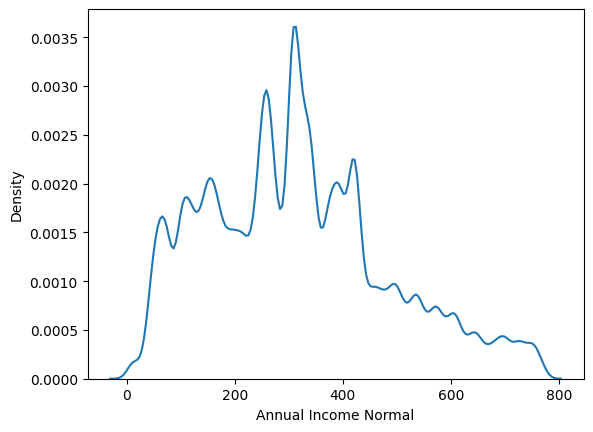

Premium Amount Normal 0.19927083763811101 -0.20863572846113687


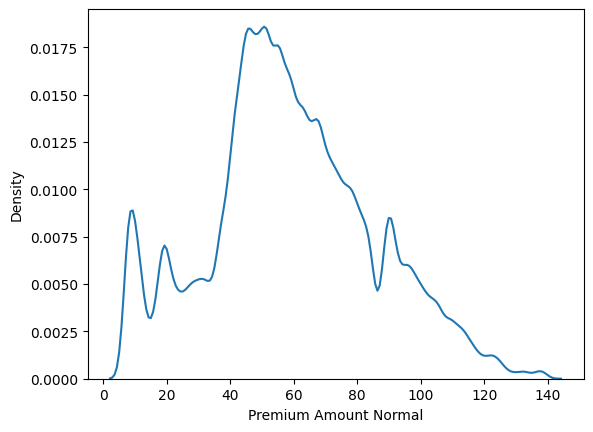

In [78]:
continuous_After = ["Annual Income Normal","Premium Amount Normal"]
for i in continuous_After:
  print(i,df[i].skew(),df[i].kurtosis())
  sns.kdeplot(df[i])
  plt.show()

In [79]:
df

,Age,Gender,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Policy_Start_Year,Policy_Start_Date,Policy_Start_Month,Annual Income Normal,Premium Amount Normal
0,19.0,0.0,1.0,1.000000,0.0,1.0,22.598761,2.0,2.0,2.0,17.0,372.00000,5.0,2.0,0.0,3.0,2.0,2023,23,12,198.489401,105.126094
1,39.0,0.0,0.0,3.000000,2.0,0.0,15.569731,0.0,1.0,1.0,12.0,694.00000,2.0,0.0,1.0,1.0,2.0,2023,12,6,353.966291,75.019478
2,23.0,1.0,0.0,3.000000,1.0,1.0,47.177549,1.0,2.0,1.0,14.0,592.92435,3.0,1.0,1.0,3.0,2.0,2023,30,9,318.012500,45.623524
3,21.0,1.0,1.0,2.000000,0.0,0.0,10.938144,0.0,0.0,1.0,0.0,367.00000,1.0,2.0,1.0,0.0,0.0,2024,12,6,751.272859,53.317267
4,21.0,1.0,2.0,1.000000,0.0,1.0,20.376094,0.0,2.0,0.0,8.0,598.00000,4.0,2.0,1.0,3.0,2.0,2021,1,12,396.251177,87.933309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,36.0,0.0,1.0,0.000000,2.0,2.0,13.772907,2.0,2.0,1.0,5.0,372.00000,3.0,2.0,0.0,0.0,0.0,2023,3,5,328.551055,70.194183
1199996,54.0,1.0,0.0,2.009934,2.0,1.0,11.483482,0.0,1.0,1.0,10.0,597.00000,4.0,2.0,0.0,3.0,0.0,2022,10,9,376.343759,55.306195
1199997,19.0,1.0,0.0,0.000000,2.0,0.0,14.724469,1.0,0.0,0.0,19.0,592.92435,6.0,1.0,0.0,1.0,1.0,2021,25,5,453.561192,36.522721
1199998,55.0,1.0,2.0,1.000000,3.0,0.0,18.547381,1.0,2.0,1.0,7.0,407.00000,4.0,2.0,0.0,0.0,0.0,2021,19,9,307.263642,46.826222


In [80]:
df.shape

(1200000, 22)

In [81]:
print(df['Premium Amount Normal'].min(),df['Premium Amount Normal'].max())

6.944271909999157 139.4072133945083


In [82]:
y = df['Premium Amount Normal']

In [83]:
y

0          105.126094
1           75.019478
2           45.623524
3           53.317267
4           87.933309
              ...    
1199995     70.194183
1199996     55.306195
1199997     36.522721
1199998     46.826222
1199999     97.599197
Name: Premium Amount Normal, Length: 1200000, dtype: float64

In [84]:
x = df.drop(columns=["Premium Amount Normal"],axis=1)

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.30)

In [87]:
df.shape

(1200000, 22)

In [88]:
y_test

1197885     71.375745
272183      67.397406
837985      25.784888
13940       50.801515
509675      58.728906
              ...    
132104      78.796040
1174953     55.026310
210031     121.822454
1090601     88.376988
872192      81.210576
Name: Premium Amount Normal, Length: 360000, dtype: float64

Traning the Model

In [89]:
# ==============================
# Import libraries
# ==============================
import time
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ==============================
# Define models
# ==============================
models = [
    ("RandomForest", RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)),
    ("GradientBoosting", GradientBoostingRegressor(random_state=42)),
    ("AdaBoost", AdaBoostRegressor(random_state=42)),
    ("XGBoost", XGBRegressor(n_estimators=200, tree_method="hist", n_jobs=-1, random_state=42))
]

# ==============================
# Train & evaluate
# ==============================
reports = []

for model_name, model in models:
    print(f"Training {model_name}...")
    start = time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    elapsed = round(time.time() - start, 2)

    # Build report in "0,1" style format
    report = {
        "0": {
            "R2 Score": r2_score(y_test, y_pred),
            "MAE": mean_absolute_error(y_test, y_pred),
            "MSE": mean_squared_error(y_test, y_pred),
            "Train+Predict Time (s)": elapsed
        },
        "1": {   # duplicate or alternative block
            "R2 Score": r2_score(y_test, y_pred),
            "MAE": mean_absolute_error(y_test, y_pred),
            "MSE": mean_squared_error(y_test, y_pred),
            "Train+Predict Time (s)": elapsed
        },
        "Model": model_name
    }
    reports.append(report)

# ==============================
# Output
# ==============================
print("\n=== Reports ===")
for i, r in enumerate(reports):
    print(f"\nReport[{i}]:")
    print(r)


Training RandomForest...
Training GradientBoosting...
Training AdaBoost...
Training XGBoost...

=== Reports ===

Report[0]:
{'0': {'R2 Score': 0.05102114815236958, 'MAE': 19.809864011388726, 'MSE': 651.0366279165264, 'Train+Predict Time (s)': 490.69}, '1': {'R2 Score': 0.05102114815236958, 'MAE': 19.809864011388726, 'MSE': 651.0366279165264, 'Train+Predict Time (s)': 490.69}, 'Model': 'RandomForest'}

Report[1]:
{'0': {'R2 Score': 0.04589254060553294, 'MAE': 20.02932849169318, 'MSE': 654.5550533869139, 'Train+Predict Time (s)': 215.48}, '1': {'R2 Score': 0.04589254060553294, 'MAE': 20.02932849169318, 'MSE': 654.5550533869139, 'Train+Predict Time (s)': 215.48}, 'Model': 'GradientBoosting'}

Report[2]:
{'0': {'R2 Score': 0.011685743885182509, 'MAE': 20.69677217193109, 'MSE': 678.022254521359, 'Train+Predict Time (s)': 30.02}, '1': {'R2 Score': 0.011685743885182509, 'MAE': 20.69677217193109, 'MSE': 678.022254521359, 'Train+Predict Time (s)': 30.02}, 'Model': 'AdaBoost'}

Report[3]:
{'0': 

In [90]:
reports

[{'0': {'R2 Score': 0.05102114815236958,
   'MAE': 19.809864011388726,
   'MSE': 651.0366279165264,
   'Train+Predict Time (s)': 490.69},
  '1': {'R2 Score': 0.05102114815236958,
   'MAE': 19.809864011388726,
   'MSE': 651.0366279165264,
   'Train+Predict Time (s)': 490.69},
  'Model': 'RandomForest'},
 {'0': {'R2 Score': 0.04589254060553294,
   'MAE': 20.02932849169318,
   'MSE': 654.5550533869139,
   'Train+Predict Time (s)': 215.48},
  '1': {'R2 Score': 0.04589254060553294,
   'MAE': 20.02932849169318,
   'MSE': 654.5550533869139,
   'Train+Predict Time (s)': 215.48},
  'Model': 'GradientBoosting'},
 {'0': {'R2 Score': 0.011685743885182509,
   'MAE': 20.69677217193109,
   'MSE': 678.022254521359,
   'Train+Predict Time (s)': 30.02},
  '1': {'R2 Score': 0.011685743885182509,
   'MAE': 20.69677217193109,
   'MSE': 678.022254521359,
   'Train+Predict Time (s)': 30.02},
  'Model': 'AdaBoost'},
 {'0': {'R2 Score': 0.05618621699893778,
   'MAE': 19.726925804247696,
   'MSE': 647.493188567

In [ ]:
import pickle

# Find the XGBoost model from your models list or reports
for model_name, model in models:
    if model_name == "XGBoost":
        # Save the trained XGBoost model
        with open("Insurance_Predection_XGBoost_model_new.pkl", "wb") as f:
            pickle.dump(model, f)
        print("✅ XGBoost model saved as Insurance_Predection_XGBoost_model_new.pkl")
        break


✅ XGBoost model saved as Insurance_Predection_XGBoost_model_new.pkl


Initialize MLflow

In [ ]:
# ==============================
# Initialize MLflow
# ==============================
import mlflow
import mlflow.sklearn
import mlflow.xgboost
import pandas as pd

mlflow.set_experiment("Smart Insurance Predictions")
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# ==============================
# Step 1: Log metrics only (no heavy models yet)
# ==============================
best_score = float("-inf")
best_model = None
best_model_name = None
best_report = None

for i, element in enumerate(models):
    model_name = element[0]   # e.g., "RandomForest"
    model = element[1]        # trained model object
    report = reports[i]       # metrics report
    r2 = report["0"]["R2 Score"]

    print(f"Evaluating {model_name}... (R²={r2:.4f})")

    with mlflow.start_run(run_name=model_name):
        mlflow.log_metrics({
            "R2_Score": r2,
            "MAE": report["0"]["MAE"],
            "MSE": report["0"]["MSE"],
            "Train_Predict_Time": report["0"]["Train+Predict Time (s)"]
        })

    # Track the best model by R²
    if r2 > best_score:
        best_score = r2
        best_model = model
        best_model_name = model_name
        best_report = report

# ==============================
# Step 2: Log only the best model (efficiently)
# ==============================
print(f"\nBest model: {best_model_name} (R²={best_score:.4f})")

with mlflow.start_run(run_name=f"{best_model_name}_BEST"):
    mlflow.log_metrics({
        "R2_Score": best_report["0"]["R2 Score"],
        "MAE": best_report["0"]["MAE"],
        "MSE": best_report["0"]["MSE"],
        "Train_Predict_Time": best_report["0"]["Train+Predict Time (s)"]
    })

    # Input example for signature (optional)
    try:
        input_example = pd.DataFrame(x_test[:1], columns=x_test.columns)
    except:
        input_example = None

    # Log best model with joblib (memory efficient)
    if "XGB" in best_model_name:
        mlflow.xgboost.log_model(
            best_model,
            name="model",
            input_example=input_example,
            pip_requirements=[],
        )
    else:
        mlflow.sklearn.log_model(
            best_model,
            name="model",
            input_example=input_example,
            pip_requirements=[],
            serialization_format="joblib"   # prevents MemoryError
        )


Evaluating RandomForest... (R²=0.0498)
🏃 View run RandomForest at: http://127.0.0.1:5000/#/experiments/625406456932585665/runs/8a789306a6d2482c96885eeb4ab849a3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/625406456932585665
Evaluating GradientBoosting... (R²=0.0450)
🏃 View run GradientBoosting at: http://127.0.0.1:5000/#/experiments/625406456932585665/runs/d2734df860304fc4800bd4eb58b961e8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/625406456932585665
Evaluating AdaBoost... (R²=0.0135)
🏃 View run AdaBoost at: http://127.0.0.1:5000/#/experiments/625406456932585665/runs/1b70098c19d84933a1613482425ce6e1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/625406456932585665
Evaluating XGBoost... (R²=0.0554)
🏃 View run XGBoost at: http://127.0.0.1:5000/#/experiments/625406456932585665/runs/5ac6e9ce2ccf4a7788a72389d7791f73
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/625406456932585665

Best model: XGBoost (R²=0.0554)


🏃 View run XGBoost_BEST at: http://127.0.0.1:5000/#/experiments/625406456932585665/runs/f5999f8918ee4ad8868feb4bc691780e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/625406456932585665


Registered the Model

In [ ]:
#The registered model
import mlflow

# Name of the registered model
model_name = "XGBoost"

# Ask user for Run ID
run_id = input("Please type RunID: ")

# Correct model URI (artifact path is 'model', not model_name)
model_uri = f"runs:/{run_id}/model"

# Register the model
mlflow.register_model(model_uri=model_uri, name=model_name)


Successfully registered model 'XGBoost'.
2025/09/05 20:46:42 WARNING mlflow.tracking._model_registry.fluent: Run with id f5999f8918ee4ad8868feb4bc691780e has no artifacts at artifact path 'model', registering model based on models:/m-c34d75f9dbae4a88979192a51fb8e074 instead
2025/09/05 20:46:42 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoost, version 1
Created version '1' of model 'XGBoost'.


<ModelVersion: aliases=[], creation_timestamp=1757085402360, current_stage='None', deployment_job_state=<ModelVersionDeploymentJobState: current_task_name='', job_id='', job_state='DEPLOYMENT_JOB_CONNECTION_STATE_UNSPECIFIED', run_id='', run_state='DEPLOYMENT_JOB_RUN_STATE_UNSPECIFIED'>, description='', last_updated_timestamp=1757085402360, metrics=None, model_id=None, name='XGBoost', params=None, run_id='f5999f8918ee4ad8868feb4bc691780e', run_link='', source='models:/m-c34d75f9dbae4a88979192a51fb8e074', status='READY', status_message=None, tags={}, user_id='', version='1'>

Create Pickle file

In [ ]:
import pickle
import os

# Pickle filename
pickle_filename = "XGBoost_model.pkl"

# Save the model locally
with open(pickle_filename, "wb") as f:
    pickle.dump(best_model, f)

# Log it as an artifact in MLflow (so you can download from UI)
with mlflow.start_run(run_name="XGBoost_PKL"):
    mlflow.log_artifact(pickle_filename)

# (Optional) remove local file if you don't need it
os.remove(pickle_filename)

print(f"✅ Pickle file saved and logged as artifact: {pickle_filename}")


🏃 View run XGBoost_PKL at: http://127.0.0.1:5000/#/experiments/625406456932585665/runs/8b6cac7af9194c43ab35803bf01e2461
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/625406456932585665
✅ Pickle file saved and logged as artifact: XGBoost_model.pkl


Load the Model and Testing

In [ ]:
import mlflow.xgboost

# Define model name and version
model_name = "XGBoost"
model_version = 1

# Model URI from Model Registry
model_uri = f"models:/{model_name}@challenger"

# Load the model
loaded_model = mlflow.xgboost.load_model(model_uri)

# Make predictions
y_pred = loaded_model.predict(x_test)

# Show first 4 predictions
print(y_pred[:4])


[63.63848  60.152138 65.64393  60.62012 ]


In [ ]:
from mlflow.tracking import MlflowClient

client = MlflowClient()

# Source model (registered model name and version)
src_model_name = "XGBoost"
src_version = 1   # update to the actual version you want to copy

# Destination model
dst_model_name = "Smart-Insurance-Premium-Predection"

# Copy model version
client.copy_model_version(
    src_model_uri=f"models:/{src_model_name}/{src_version}",
    dst_name=dst_model_name
)


Successfully registered model 'Smart-Insurance-Premium-Predection'.
Copied version '1' of model 'XGBoost' to version '1' of model 'Smart-Insurance-Premium-Predection'.


<ModelVersion: aliases=[], creation_timestamp=1757088362211, current_stage='None', deployment_job_state=None, description='', last_updated_timestamp=1757088362211, metrics=None, model_id=None, name='Smart-Insurance-Premium-Predection', params=None, run_id='f5999f8918ee4ad8868feb4bc691780e', run_link='', source='models:/XGBoost/1', status='READY', status_message=None, tags={}, user_id=None, version=1>

### Transition the Model to Production  Challenger to champion

In [ ]:
current_model_uri = f"models:/{model_name}@challenger"
production_model_name = "Smart-Insurance-Premium-Predection"

client = mlflow.MlflowClient()
client.copy_model_version(src_model_uri=current_model_uri, dst_name=production_model_name)

In [ ]:
import mlflow
import mlflow.xgboost

# Set the MLflow tracking server URI
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# Define Production model
production_model_name = "Smart-Insurance-Premium-Predection"
model_uri = f"models:/{production_model_name}@champion"

# Load the model
loaded_model = mlflow.xgboost.load_model(model_uri)

# Predict
y_pred = loaded_model.predict(x_test)
print(y_pred[:4])


[66.89021  58.65019  62.019768 55.93573 ]
